In [10]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [11]:
config = pd.read_csv("config 1.csv")

In [12]:
consumerKey = config['twitterApiKey'][0]
consumerSecret = config['twitterApiSecret'][0]
accessToken= config['twitterApiAccessToken'][0]
accessTokenSecret= config['twitterApiAccessTokenSecret'][0]

In [13]:
authenticate =tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [14]:
posts = api.user_timeline(screen_name = "elonmusk", count=300, lang="en", tweet_mode="extended")
print("Show the 5 recent tweets: \n")

i=1
for  tweet in posts[0:5]:
    print(str(i) + ') '+tweet.full_text + '\n')
    i = i + 1

Unexpected parameter: lang


Show the 5 recent tweets: 

1) @WallStreetSilv Can’t tell if satire or real

2) @TRHLofficial !!

3) Significant backend server architecture changes rolled out. Twitter should feel faster.

4) @stillgray !!

5) RT @Tesla: S3XY winter testing in New Zealand 🇳🇿❄️ https://t.co/UMttiFOhxU



In [15]:
df = pd.DataFrame(data=[tweet.full_text for tweet in posts], columns = ['Tweets'])
df.head()

,Tweets
0,@WallStreetSilv Can’t tell if satire or real
1,@TRHLofficial !!
2,Significant backend server architecture change...
3,@stillgray !!
4,RT @Tesla: S3XY winter testing in New Zealand ...


In [16]:
# Clean the tweet
#Creating function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+', '', text) #remove mention
    text = re.sub(r'#', '', text) #removing the '#' symbol
    text = re.sub(r'RT[\s]+',  '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyper link
    return text

#Cleaning text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df

,Tweets
0,Can’t tell if satire or real
1,!!
2,Significant backend server architecture change...
3,!!
4,: S3XY winter testing in New Zealand 🇳🇿❄️
...,...
195,Hope all goes well
196,A masterpiece from the future
197,We were on a Hotz streak! 🥁
198,"Maybe so, in which case … buying opportunity!..."


In [17]:
# Function to get subjectivity(opinion)

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Function to get polarity(positive or negative)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new dataframe
df

,Tweets,Subjectivity,Polarity
0,Can’t tell if satire or real,0.300000,0.200000
1,!!,0.000000,0.000000
2,Significant backend server architecture change...,0.875000,0.375000
3,!!,0.000000,0.000000
4,: S3XY winter testing in New Zealand 🇳🇿❄️,0.454545,0.136364
...,...,...,...
195,Hope all goes well,0.000000,0.000000
196,A masterpiece from the future,0.125000,0.000000
197,We were on a Hotz streak! 🥁,0.000000,0.000000
198,"Maybe so, in which case … buying opportunity!...",0.637143,-0.054286


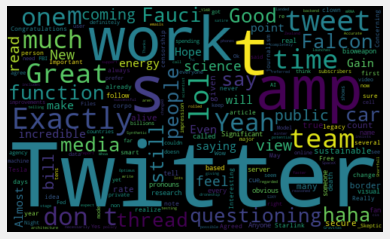

In [18]:
# Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "Bilinear")
plt.axis('off')
plt.show()

In [19]:
# Function to compute negative, neutral and positive analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Can’t tell if satire or real,0.300000,0.200000,Positive
1,!!,0.000000,0.000000,Neutral
2,Significant backend server architecture change...,0.875000,0.375000,Positive
3,!!,0.000000,0.000000,Neutral
4,: S3XY winter testing in New Zealand 🇳🇿❄️,0.454545,0.136364,Positive
...,...,...,...,...
195,Hope all goes well,0.000000,0.000000,Neutral
196,A masterpiece from the future,0.125000,0.000000,Neutral
197,We were on a Hotz streak! 🥁,0.000000,0.000000,Neutral
198,"Maybe so, in which case … buying opportunity!...",0.637143,-0.054286,Negative


In [20]:
# Print all Positive tweet

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+')'+ sortedDF['Tweets'][i])
        print()
        j = j +1

1) Can’t tell if satire or real

2)Significant backend server architecture changes rolled out. Twitter should feel faster.

3): S3XY winter testing in New Zealand 🇳🇿❄️ 

4) Thanks Optimus 🤖 ♥️

5) Accurate lol

6)New Twitter policy is to follow the science, which necessarily includes reasoned questioning of the science

7) Synthetic mRNA has incredible potential!

8) Yeah, I’m not a fan of pronouns when someone is giving every possible visual cue for he or she, but then still insists on telling you exactly what you expect. 

I do support pronouns that aren’t completely obvious based on visual cues.

9)Congratulations SpaceX Falcon team on 60 successful launches this year!! 

10) Free phones to report themselves and they never even call to say hi 😢

11) Really?

12): Falcon 9’s first stage has landed on the A Shortfall of Gravitas droneship 

13) Exactly. Why would anyone trust corpo journalism?

14)   lol

15)_  Really? _us

16) omg lol

17) “Gain-of-function” in this context is just a

In [21]:
# Print Negative tweet
# ascending ='False'
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j = j+ 1

1)  The AIs will write each other lots of emails!

2)  No matter how smart someone is, they are always some % wrong

3)  Even solar plus batteries on a small section of Spain would solve EU energy needs

4) “Don’t be the clown on the clown car!”

Too late haha

5)  Those are definitely the most absurd predictions I’ve ever heard, while also showing astonishing lack of awareness of the progress of artificial intelligence and sustainable energy.

6)  Approaching 100 Starlinks active in Iran

7)  False, it is still there

8)  1. The message is actually still up. This is fake news.

2. Twitter doesn’t prevent suicide.

9)  No special treatment for corpo journalists anymore

10)  True, “progressive” professors are the root of this evil

11)  Yeah, it’s ridiculous

12)  What utter insanity that tens of billions are being spent for border security of other countries, but none for ours!!

13)   No oversight!? That sounds as fishy as the random $60M allocation in this bill for Salmon.

14)  May

In [22]:
# Print Neutral tweet
# ascending ='False'
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j = j+ 1

1)  !!

2)  !!

3)  🤣🤣

4)  🤔

5)   Works for me

6)  Whoa

7) 

8)   🤣

9)  Anyone who says that questioning them is questioning science itself cannot be regarded as a scientist

10)  🤣🤣🔥🔥

11)  🎯

12) They did it! 

13)   I’m not cis, you are

14)  🤣🤣

15) _Y34R  “Gain-of-function” should be called “bioweapon” research, as the function referred is death! 

What was the name changed to this time?

16)  Agreed

17) : Liftoff! 

18) : Watch Falcon 9 launch 54 Starlink satellites to orbit →  

19)  And you have tiny testicles!

20)  I invite  to correct or amend this thread

21)    The legacy media should worry about its reputation. We have only just begun.

22)    Concerning

23)   🤣🤣

24)  🤔

25) I’m not brainwashed!! 

26) 

27)   !!

28)  Despite these glaring issues, Twitter nonetheless had an internal Slack channel unironically called “Fauci Fan Club” 🤯

29)  

30)  !

31)  Such an obvious move!

32)  Yikes!

33)  I’m open to the idea

34)  Uhh …

35)  Twitter can change that

36) 

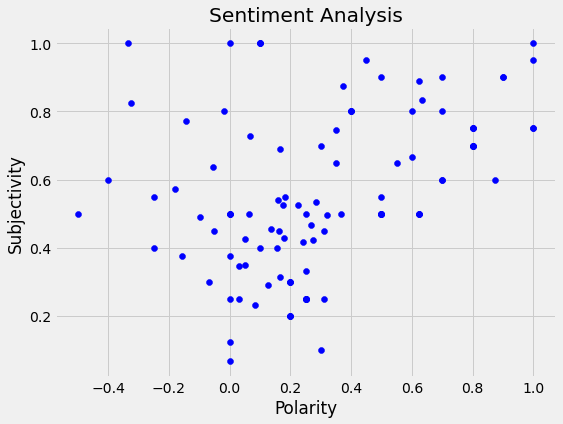

In [23]:
# Plot polarity and Subjectvity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [24]:
# Percentage of positive tweet
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round (ptweets.shape[0] / df.shape[0]*100, 1)

42.5

In [25]:
# Percentage of negative tweet
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round (ntweets.shape[0] / df.shape[0]*100, 1)

7.0

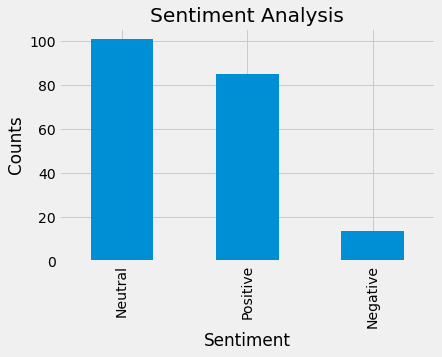

In [26]:
# Showing Value Count
df['Analysis'].value_counts

#plot and visualize count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

<AxesSubplot:ylabel='None'>

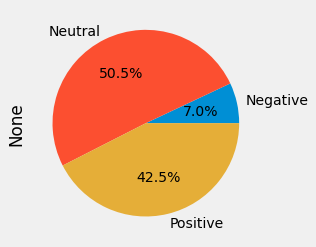

In [27]:
df.groupby('Analysis').size().plot(kind='pie', autopct='%1.1f%%')

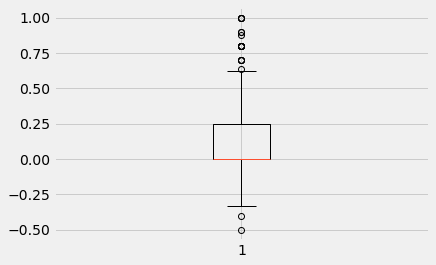

In [28]:
plt.boxplot(df['Polarity']);
plt.show()

In [29]:
#plt.boxplot(df['Polarity'],notch='True',patch_artist=True);
#plt.show()

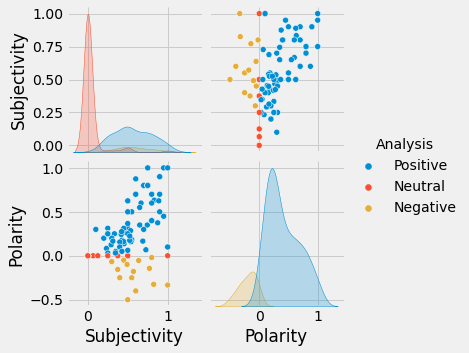

In [30]:
sns.pairplot(df, hue ='Analysis')
# to show
plt.show()

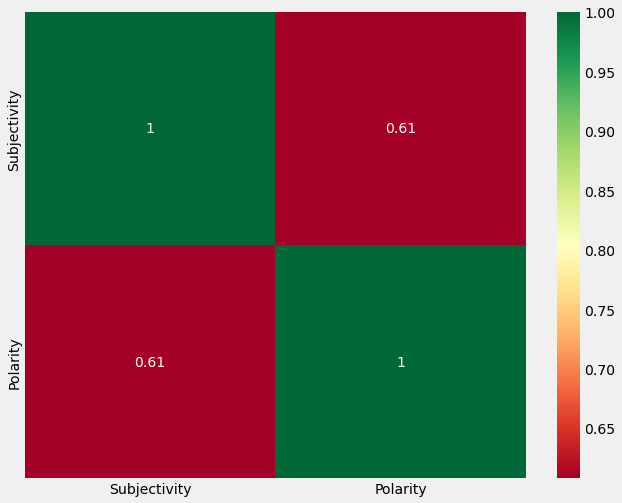

In [31]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

C:\Users\umesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Subjectivity', ylabel='Density'>

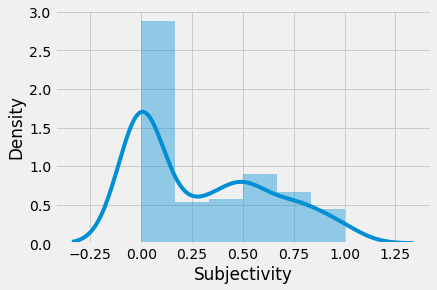

In [32]:
sns.distplot(df['Subjectivity'])

C:\Users\umesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polarity', ylabel='Density'>

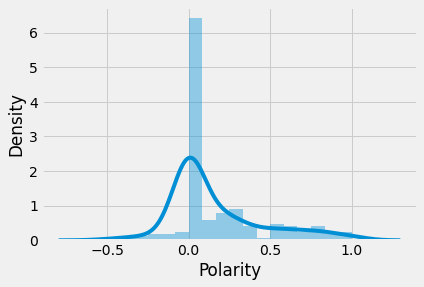

In [33]:
sns.distplot(df['Polarity'])

In [34]:
Response = pd.read_csv("Form-_1_.csv")

In [35]:
Response

,Username1,Name1,Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh,He is infected with a mental version of this physical virus,Good for you !,Theyâ€™re bots in human form,This is necessary to restore public trust,Username2,Name2,Thanksgiving cuisine is such a delightful symphony of flavor,Oh we have quite the adventure ahead!,I wonder what Earth will be like 88 million years from now,World-class software aces are joining Twitter,This makes sense
0,Hogwarts143@gmail.com,Harry potter,Neutral,Negative,Postive,Negative,Neutral,richasingh0418@gmail.com,Richa Singh,Negative,Negative,Neutral,Postive,Postive
1,sv72910501@gmail.com,SHUBHAM VERMA,Postive,Neutral,Neutral,Negative,Neutral,arabkansal123@gmail.com,Arab Kansal,Postive,Neutral,Postive,Neutral,Negative
2,shivalikgaur@gmail.com,Shivalik,Postive,Negative,Postive,Negative,Neutral,kumar.sharan379@gmail.com,Sharan kumar Kantale,Postive,Postive,Negative,Neutral,Postive
3,poswalnikhil@gmail.com,Nikhil,Postive,Postive,Postive,Negative,Postive,gshash1921123@gmail.com,Gaurav Sharan,Postive,Postive,Negative,Postive,Postive
4,naveensnk27@gmail.com,Naveen Kumar S,Postive,Negative,Postive,Neutral,Postive,jiyajaisingh3110@gmail.com,Jiya Jaisingh,Postive,Neutral,Negative,Postive,Postive
5,burningnoxius.19@gmail.com,Abhishek,Neutral,Neutral,Neutral,Neutral,Neutral,deepikamittal0012@gmail.com,Deepika Mittal,Postive,Postive,Negative,Neutral,Neutral
6,manjupahal1664@gmail.com,Manju,Negative,Negative,Negative,Negative,Neutral,priyankatotlani3@gmail.com,Priyanka,Neutral,Postive,Negative,Postive,Postive
7,sakshimishra686@gmail.com,Sakshi,Neutral,Postive,Negative,Postive,Postive,smit.sanghvi@yahoo.com,Divya,Neutral,Postive,Postive,Neutral,Postive
8,badarnisha2003@gmail.com,Badarnisha,Postive,Negative,Postive,Negative,Neutral,lenekarmrunal061@gmail.com,Mrunal lenekar,Postive,Postive,Postive,Neutral,Neutral
9,abdur24061986@gmail.com,Syed Muhammad Abdur Rahman,Postive,Neutral,Postive,Postive,Postive,kandpal2003@gmail.com,Lakshya Kandpal,Neutral,Postive,Neutral,Postive,Neutral


In [36]:
# Dropping unecessary columns 

Response = Response.drop(['Username1', 'He is infected with a mental version of this physical virus' ,'Username2','Name1','Name2',' Theyâ€™re bots in human form'], axis=1)

In [37]:
x = Response.dropna()

# Dropping NULL values

In [38]:
df4_Analysis = pd.DataFrame(x, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [39]:
df4_Analysis.index.name = 'Id'

In [40]:
df4_Analysis

,Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh,Good for you !,This is necessary to restore public trust,Thanksgiving cuisine is such a delightful symphony of flavor,Oh we have quite the adventure ahead!,I wonder what Earth will be like 88 million years from now,World-class software aces are joining Twitter,This makes sense
Id,,,,,,,,
0,Neutral,Postive,Neutral,Negative,Negative,Neutral,Postive,Postive
1,Postive,Neutral,Neutral,Postive,Neutral,Postive,Neutral,Negative
2,Postive,Postive,Neutral,Postive,Postive,Negative,Neutral,Postive
3,Postive,Postive,Postive,Postive,Postive,Negative,Postive,Postive
4,Postive,Postive,Postive,Postive,Neutral,Negative,Postive,Postive
5,Neutral,Neutral,Neutral,Postive,Postive,Negative,Neutral,Neutral
6,Negative,Negative,Neutral,Neutral,Postive,Negative,Postive,Postive
7,Neutral,Negative,Postive,Neutral,Postive,Postive,Neutral,Postive
8,Postive,Postive,Neutral,Postive,Postive,Postive,Neutral,Neutral


In [41]:
x.columns

Index(['Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh',
       'Good for you !', 'This is necessary to restore public trust',
       'Thanksgiving cuisine is such a delightful symphony of flavor',
       'Oh we have quite the adventure ahead!',
       'I wonder what Earth will be like 88 million years from now',
       'World-class software aces are joining Twitter', 'This makes sense'],
      dtype='object')

In [42]:
x.describe()

,Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh,Good for you !,This is necessary to restore public trust,Thanksgiving cuisine is such a delightful symphony of flavor,Oh we have quite the adventure ahead!,I wonder what Earth will be like 88 million years from now,World-class software aces are joining Twitter,This makes sense
count,24,24,24,24,24,24,24,24
unique,3,3,3,3,3,3,3,3
top,Postive,Postive,Postive,Neutral,Postive,Postive,Postive,Neutral
freq,11,15,12,12,14,9,13,11


In [43]:
l = Response.columns
l

Index(['Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh',
       'Good for you !', 'This is necessary to restore public trust',
       'Thanksgiving cuisine is such a delightful symphony of flavor',
       'Oh we have quite the adventure ahead!',
       'I wonder what Earth will be like 88 million years from now',
       'World-class software aces are joining Twitter', 'This makes sense'],
      dtype='object')

In [44]:
# Finding Positive, Negative and Neutral response for each question

Total_Positive = 0
Total_Negative = 0
Total_Neutral = 0
for x in l:
    print(x) 
    a = print("Positive Response :",Response[x].value_counts()['Neutral'])
    b = print("Negative Response :",Response[x].value_counts()['Negative'])
    c = print("Neutral Response :",Response[x].value_counts()['Postive'])

Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh
Positive Response : 14
Negative Response : 3
Neutral Response : 12
Good for you !
Positive Response : 10
Negative Response : 2
Neutral Response : 17
This is necessary to restore public trust
Positive Response : 12
Negative Response : 2
Neutral Response : 15
Thanksgiving cuisine is such a delightful symphony of flavor
Positive Response : 12
Negative Response : 1
Neutral Response : 11
Oh we have quite the adventure ahead!
Positive Response : 8
Negative Response : 2
Neutral Response : 14
I wonder what Earth will be like 88 million years from now
Positive Response : 6
Negative Response : 9
Neutral Response : 9
World-class software aces are joining Twitter
Positive Response : 9
Negative Response : 2
Neutral Response : 13
This makes sense
Positive Response : 11
Negative Response : 3
Neutral Response : 10


In [45]:
# Finding Total number of Positive, Negative and Neutral responses

Total_Positive = 0
Total_Negative = 0
Total_Neutral = 0

totalni = 0
totalneu = 0
totalp = 0

for x in l:
    neu = Response[x].value_counts()['Neutral']
    totalneu = totalneu + neu
    ni = Response[x].value_counts()['Negative']
    totalni = totalni + ni
    p = Response[x].value_counts()['Postive']
    totalp = totalp + p
    
print("Total Negative Response : ",totalni)
print("Total Neutral response : ",totalneu)
print("Total Positvie response : ",totalp)

Total Negative Response :  24
Total Neutral response :  82
Total Positvie response :  101


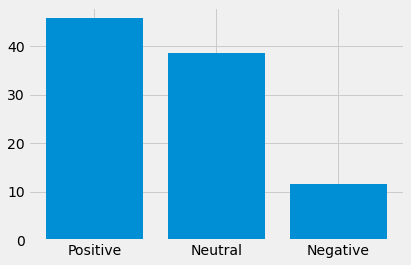

In [46]:
Form_df = ['Positive', 'Neutral', 'Negative']
value = [45.8, 38.6, 11.6]
plt.bar(Form_df, value)
plt.show()

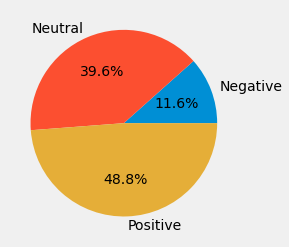

In [47]:
y = np.array([totalni,totalneu,totalp])
mylabels=['Negative','Neutral','Positive']
plt.pie(y,autopct='%1.1f%%',labels = mylabels)
plt.show()

p=0
n=0
ni =0
for x in l:
    Total_Positive = Response[x].value_counts()['Neutral']
    n = n + Total_Positive
    Total_Negative = Response[x].value_counts()['Negative']
    p = p + Total_Positive
    Total_Neutral = Response[x].value_counts()['Postive']
    ni = ni + Total_Positive

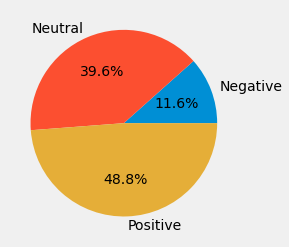

In [48]:
y = np.array([totalni,totalneu,totalp])
mylabels=['Negative','Neutral','Positive']
plt.pie(y,autopct='%1.1f%%',labels = mylabels)
plt.show()

<AxesSubplot:ylabel='None'>

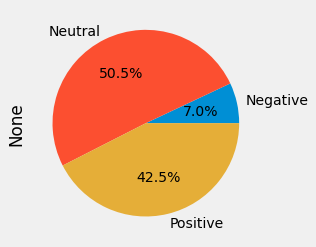

In [49]:
df.groupby('Analysis').size().plot(kind='pie', autopct='%1.1f%%')

In [50]:
Dataframe = { 'Positive':["42.0%", "48.8%"],
             'Neutral':["46.0%", "39.6%"],
             'Negative' :["12.0%" , "11.6%"] }

In [51]:
df1= pd.DataFrame(Dataframe, index = ['Algorithm Analysis', 'Form Analysis'])

In [52]:
df1

,Positive,Neutral,Negative
Algorithm Analysis,42.0%,46.0%,12.0%
Form Analysis,48.8%,39.6%,11.6%


In [53]:
Dataframe2 = { 'Questions':['Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh',
       'Good for you !', 'This is necessary to restore public trust',
       'Thanksgiving cuisine is such a delightful symphony of flavor',
       'Oh we have quite the adventure ahead!',
       'I wonder what Earth will be like 88 million years from now',
       'World-class software aces are joining Twitter', 'This makes sense'] }

In [54]:
df2= pd.DataFrame(Dataframe2)

In [55]:
df2

,Questions
0,Fun level on Twitter has definitely increased!...
1,Good for you !
2,This is necessary to restore public trust
3,Thanksgiving cuisine is such a delightful symp...
4,Oh we have quite the adventure ahead!
5,I wonder what Earth will be like 88 million ye...
6,World-class software aces are joining Twitter
7,This makes sense


In [56]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Function to get polarity(positive or negative)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df2['Subjectivity'] = df2['Questions'].apply(getSubjectivity)
df2['Polarity'] = df2['Questions'].apply(getPolarity)

# Show new dataframe
df2

,Questions,Subjectivity,Polarity
0,Fun level on Twitter has definitely increased!...,0.483333,0.366667
1,Good for you !,0.600000,0.875000
2,This is necessary to restore public trust,0.533333,0.000000
3,Thanksgiving cuisine is such a delightful symp...,0.750000,0.500000
4,Oh we have quite the adventure ahead!,0.000000,0.000000
5,I wonder what Earth will be like 88 million ye...,0.000000,0.000000
6,World-class software aces are joining Twitter,0.000000,0.000000
7,This makes sense,0.000000,0.000000


In [57]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df2['Analysis']=df2['Polarity'].apply(getAnalysis)

# Show dataframe
df2.index.name = 'Ques_id'
df2

,Questions,Subjectivity,Polarity,Analysis
Ques_id,,,,
0,Fun level on Twitter has definitely increased!...,0.483333,0.366667,Positive
1,Good for you !,0.600000,0.875000,Positive
2,This is necessary to restore public trust,0.533333,0.000000,Neutral
3,Thanksgiving cuisine is such a delightful symp...,0.750000,0.500000,Positive
4,Oh we have quite the adventure ahead!,0.000000,0.000000,Neutral
5,I wonder what Earth will be like 88 million ye...,0.000000,0.000000,Neutral
6,World-class software aces are joining Twitter,0.000000,0.000000,Neutral
7,This makes sense,0.000000,0.000000,Neutral


In [58]:
df3 = {'Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh': ['Positive',24, 11, 'Positive','Right'],
      'Good for you !' : ['Positive', 24,15, 'Positive','Right'], 'This is necessary to restore public trust':['Positive', 24,12, 'Neutral','Wrong'],
      'Thanksgiving cuisine is such a delightful symphony of flavor':['Positive',24, 12, 'Neutral','Wrong'],'Oh we have quite the adventure ahead!':['Neutral',24, 14, 'Positive','Wrong'],
      'I wonder what Earth will be like 88 million years from now':['Positive',24, 9, 'Neutral','Wrong'],'World-class software aces are joining Twitter':['Positive', 24,13, 'Neutral','Wrong'],
      'This makes sense':['Neutral',24, 11, 'Neutral','Right']}

In [59]:
df3_Analysis = pd.DataFrame(df3, index=['Form top response','count','Freuqency of top response', 'Algorithm Analysis','Analysis Done'])

In [60]:
df3_Analysis

,Fun level on Twitter has definitely increased! Iâ€™m having a great time tbh,Good for you !,This is necessary to restore public trust,Thanksgiving cuisine is such a delightful symphony of flavor,Oh we have quite the adventure ahead!,I wonder what Earth will be like 88 million years from now,World-class software aces are joining Twitter,This makes sense
Form top response,Positive,Positive,Positive,Positive,Neutral,Positive,Positive,Neutral
count,24,24,24,24,24,24,24,24
Freuqency of top response,11,15,12,12,14,9,13,11
Algorithm Analysis,Positive,Positive,Neutral,Neutral,Positive,Neutral,Neutral,Neutral
Analysis Done,Right,Right,Wrong,Wrong,Wrong,Wrong,Wrong,Right
